# Datasets


author: steeve.laquitaine@epfl.ch  
date: 2023.10.09
last modified: 2023.10.09  
status:  OK
display-status: up-to-date  
regression: None  


## Setup

create and activate env from `npx_10m_384ch_unit_classes.txt`

In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/"

os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.load import load_campaign_params
from src.nodes.dataeng.silico import recording, probe_wiring
from src.nodes.prepro import preprocess
from src.nodes.truth.silico import ground_truth
from src.nodes.dataeng.lfp_only import stacking

# SETUP PARAMETERS
EXPERIMENT = "silico_neuropixels"   # specifies the experiment 
SIMULATION_DATE = "2023_08_17"      # specifies the run (date)
GAIN = 1e5

data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()

# PATHS
RAW_DATASET = data_conf["dataeng"]["campaign"]["output"]["trace_file_path"]

2023-10-12 10:00:09,180 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-12 10:00:09,292 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Raw traces

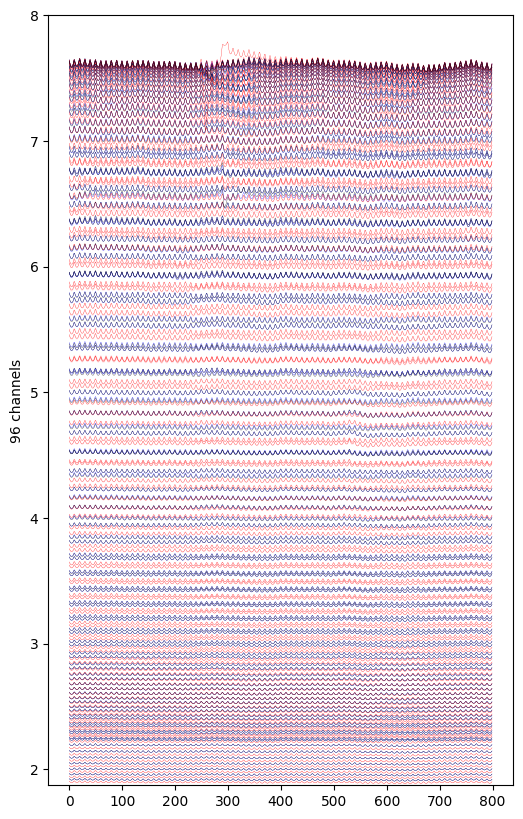

In [7]:
# plot
LINEWIDTH = 0.2
Y_STEP = 0.00001
Y_MAX = 8

# get raw traces
raw_traces = pd.read_pickle(RAW_DATASET)
n_contacts = raw_traces.shape[1]

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
SAMPFREQ = 40000    # hz
duration = 20       # in ms
n_timepoints = int(duration*SAMPFREQ/1000)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1,1, figsize=(6,10))
pos_up = 0
row = 0
for contact_i in np.arange(0,96,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(raw_traces.values[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="pink");
ax.set_ylabel("96 channels");
ax.set_ylim([np.min(raw_traces.values), Y_MAX]);

# plot (97: bottom 192:top)
pos_up = 0
row = 0
for contact_i in np.arange(96,192,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(raw_traces.values[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="blue");

# plot (193: bottom 288:top)
pos_up = 0
row = 0
for contact_i in np.arange(192,288,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(raw_traces.values[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="red");

# plot (289: bottom 384:top)
pos_up = 0
row = 0
for contact_i in np.arange(288,384,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(raw_traces.values[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="black");

Zoom in on one contact

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


13382.789

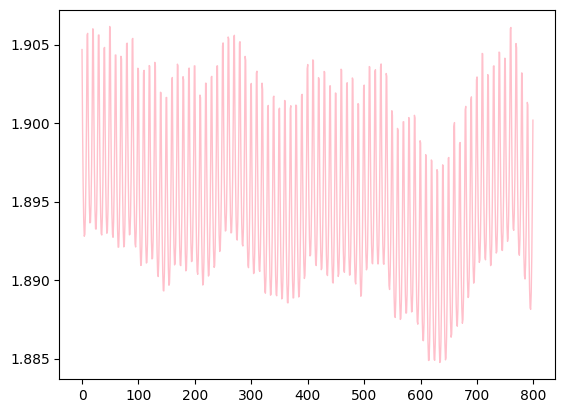

In [9]:
# plot contact 0
plt.plot(raw_traces.values[:n_timepoints, 0], linewidth=1, color="pink");

np.max(np.max(raw_traces))

### Rescaled traces (gain and offset)

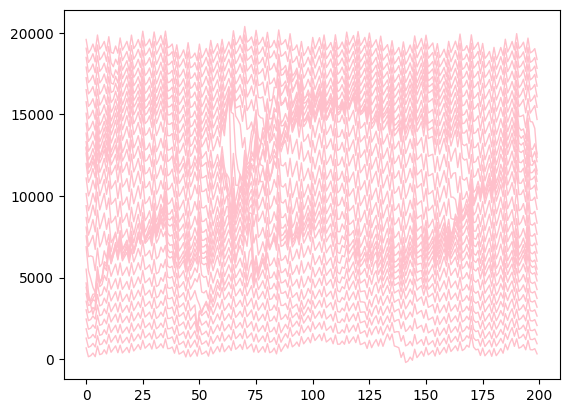

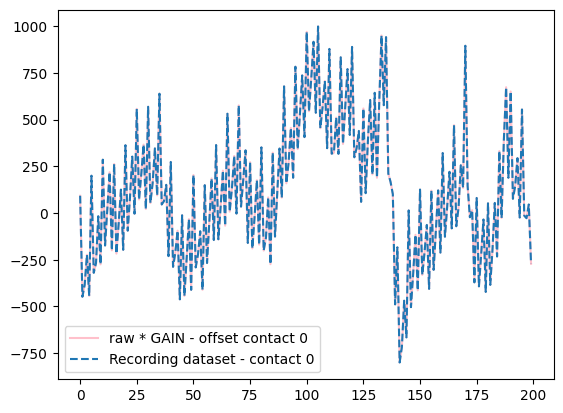

In [125]:
Y_STEP = 600

# get rescaled traces
Recording = recording.load(data_conf);
resc_traces = Recording.get_traces();

# plot
LINEWIDTH = 0.2
Y_STEP = 0.00001
Y_MAX = 8

n_contacts = resc_traces.shape[1]

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
SAMPFREQ = 40000    # hz
duration = 20       # in ms
n_timepoints = int(duration*SAMPFREQ/1000)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1,1, figsize=(6,10))
pos_up = 0
row = 0
for contact_i in np.arange(0,96,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(resc_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="pink");
ax.set_ylabel("96 channels");
ax.set_ylim([np.min(resc_traces), Y_MAX]);

# plot (97: bottom 192:top)
pos_up = 0
row = 0
for contact_i in np.arange(96,192,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(resc_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="blue");

# plot (193: bottom 288:top)
pos_up = 0
row = 0
for contact_i in np.arange(192,288,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(resc_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="red");

# plot (289: bottom 384:top)
pos_up = 0
row = 0
for contact_i in np.arange(288,384,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(resc_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="black");

# # get 20 ms (like Trautmann et al 2023)
# sampfreq = 10000    # hz
# duration = 20       # in ms
# n_timepoints = int(duration*sampfreq/1000)

# # plot
# fig, ax = plt.subplots(1,1)
# pos_up = 0
# for contact_i in np.arange(0,n_contacts,1):
#     pos_up += Y_STEP
#     ax.plot(resc_traces[:n_timepoints, contact_i] + pos_up, color="pink", linewidth=1);

# # check rescaling correct
# rescaled = raw_traces.loc[:, 0]*GAIN
# resc_offsetted = rescaled - np.mean(rescaled)

# # plot
# fig, ax = plt.subplots(1,1);
# plt.plot(resc_offsetted.values[:n_timepoints], color="pink", label="raw * GAIN - offset contact 0");
# plt.plot(resc_traces[:n_timepoints, 0], "--", label="Recording dataset - contact 0");

# plt.legend();

### Preprocessed traces

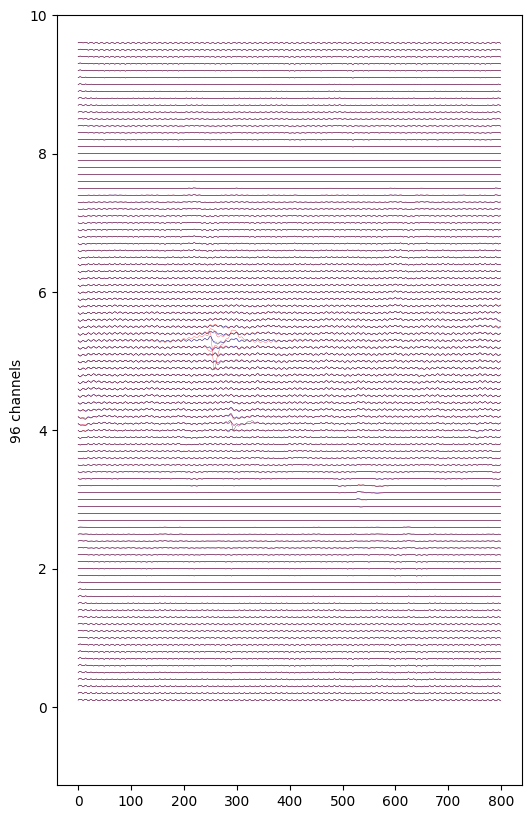

In [17]:
# get preprocessed
Recording = preprocess.load(data_conf)
prep_traces = Recording.get_traces()

# plot
LINEWIDTH = 0.2
Y_STEP = 0.1
Y_MAX = 10

n_contacts = prep_traces.shape[1]

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
SAMPFREQ = 40000    # hz
duration = 20       # in ms
n_timepoints = int(duration*SAMPFREQ/1000)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1,1, figsize=(6,10))
pos_up = 0
row = 0
for contact_i in np.arange(0,96,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="pink");
ax.set_ylabel("96 channels");
ax.set_ylim([np.min(prep_traces), Y_MAX]);

# plot (97: bottom 192:top)
pos_up = 0
row = 0
for contact_i in np.arange(96,192,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="blue");

# plot (193: bottom 288:top)
pos_up = 0
row = 0
for contact_i in np.arange(192,288,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="red");

# plot (289: bottom 384:top)
pos_up = 0
row = 0
for contact_i in np.arange(288,384,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="black");